<a href="https://colab.research.google.com/github/albertchen0286/Business-Process-Improvement-SBA-Loan-Charge-O-Analysis/blob/main/%E3%80%8CCopy_of_810_Team_Project%E3%80%8DAlbert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Business Process Improvement: SBA Loan Charge-off Analysis**

###**Data Loading**

In [ ]:
# Mount Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load data from Google Drive as raw data.
import pandas as pd
raw_data = pd.read_csv('/content/drive/My Drive/BA810/SBAnational.csv')

# Show the first 10 rows of raw data
pd.set_option('display.max_columns', None) # Showing all columns.
raw_data.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [ ]:
# Display the raw data information.
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

###**Data Cleaning**

In [ ]:
# Start by dropping borrower & bank's basic information("Name", "City", "Zip", etc) since our analysis consider them to be less relevant.
data = raw_data.drop(['LoanNr_ChkDgt', 'Name', 'City', 'Zip', 'Bank'], axis = 1)
# Leavning "State" and "BankState" to check if borrower went to a bank in the state of the business.

# Checking the null values in the remaining columns.
data.isnull().sum()

State                    14
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [ ]:
# Drop the null values in columns.
data.dropna(subset = ['State', 'BankState', 'NewExist', 'RevLineCr', 'LowDoc', 'DisbursementDate', 'MIS_Status'], inplace = True)
# Note: drop null values in "DisbursementDate" since we can not analyze loans that were never disbursed.

# Re-check for null values except in "ChgOffDate" column.
data.isnull().sum()

State                     0
BankState                 0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr                 0
LowDoc                    0
ChgOffDate           725410
DisbursementDate          0
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [ ]:
# Add a new column "DisbursedDays" calculating the number of days for each loan to be disbursed.
data['ApprovalDate'] = pd.to_datetime(data['ApprovalDate'])
data['DisbursementDate'] = pd.to_datetime(data['DisbursementDate'])
data['DisbursedDays'] = data['DisbursementDate'] - data['ApprovalDate']
data['DisbursedDays'] = pd.to_numeric(data['DisbursedDays'].dt.days, downcast='integer')

# Similarly, add a column "DefaultDays" calculating the number of days that a loan defaults after it is dsibursed.
data['ChgOffDate'] = pd.to_datetime(data['ChgOffDate'])

In [ ]:
# Remove of the "$" sign in numerical variables and change the data type.
data['DisbursementGross'] = data['DisbursementGross'].str.replace('$', '').str.replace(',', '').astype(float)
data['BalanceGross'] = data['BalanceGross'].str.replace('$', '').str.replace(',', '').astype(float)
data['ChgOffPrinGr'] = data['ChgOffPrinGr'].str.replace('$', '').str.replace(',', '').astype(float)
data['GrAppv'] = data['GrAppv'].str.replace('$', '').str.replace(',', '').astype(float)
data['SBA_Appv'] = data['SBA_Appv'].str.replace('$', '').str.replace(',', '').astype(float)

<ipython-input-10-6da517545571>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['DisbursementGross'] = data['DisbursementGross'].str.replace('$', '').str.replace(',', '').astype(float)
<ipython-input-10-6da517545571>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['BalanceGross'] = data['BalanceGross'].str.replace('$', '').str.replace(',', '').astype(float)
<ipython-input-10-6da517545571>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['ChgOffPrinGr'] = data['ChgOffPrinGr'].str.replace('$', '').str.repl

In [ ]:
# Clean up the "ApprovalFY" column.
def clean_str(x):
    if isinstance(x, str):
        return x.replace('A', '')
    return x
data['ApprovalFY'] = data['ApprovalFY'].apply(clean_str).astype('int64')

In [ ]:
# Check the categorical variables and add new columns showing values as 0 and 1.
# Check unique values in "NewExist" column.
import numpy as np
data['NewExist'].unique()
# Drop the 0 values in "NewExist" column since it does not make sense.
data = data[data['NewExist'] >= 1]
# Change the column into 0 and 1.
data['NewOrExist'] = np.where(data['NewExist'] == 2, 1, 0)

# Check the "FranchiseCode" column.
data['FranchiseCode'].unique()
# Change values larger or equal to 1 into Franchised.
data['Franchised'] = np.where(data['FranchiseCode'] == 0, 0, 1)

# Check the "RevLineCr" column.
data['RevLineCr'].unique()
# Leave only values of Yes and No.
data = data[(data['RevLineCr'] == 'Y' ) | (data['RevLineCr'] == 'N')]
data['RevLineCredit'] = np.where(data['RevLineCr'] == 'Y', 1, 0)

# Check the "LowDoc" column.
data['LowDoc'].unique()
# Leave only values of Yes and No.
data = data[(data['LowDoc'] == 'Y' ) | (data['LowDoc'] == 'N')]
data['LowDocP'] = np.where(data['LowDoc'] == 'Y', 1, 0)

# Check the unique values in "MIS_Status".
data['MIS_Status'].unique()
# Change the values of MIS_Status into 1 and 0, label its column: "MIS"
data['MIS'] = np.where(data['MIS_Status'] == 'CHGOFF', 1, 0)

<ipython-input-12-c6cd35f429c4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['NewOrExist'] = np.where(data['NewExist'] == 2, 1, 0)
<ipython-input-12-c6cd35f429c4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Franchised'] = np.where(data['FranchiseCode'] == 0, 0, 1)
<ipython-input-12-c6cd35f429c4>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [ ]:
# Check the values in "BalanceGross" column
data['BalanceGross'].value_counts()

# There are too many values of 0, we drop the column.
data.drop(columns = 'BalanceGross', inplace = True)

# Drop the columns that were used to process, now they have become duplicates.
data.drop(columns = ['NewExist', 'FranchiseCode', 'RevLineCr', 'LowDoc', 'MIS_Status'], inplace = True)

In [ ]:
data.head()

,State,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,UrbanRural,ChgOffDate,DisbursementDate,DisbursementGross,ChgOffPrinGr,GrAppv,SBA_Appv,DisbursedDays,NewOrExist,Franchised,RevLineCredit,LowDocP,MIS
0,IN,OH,451120,1997-02-28,1997,84,4,0,0,0,NaT,1999-02-28,60000.0,0.0,60000.0,48000.0,730,1,1,0,1,0
1,IN,IN,722410,1997-02-28,1997,60,2,0,0,0,NaT,1997-05-31,40000.0,0.0,40000.0,32000.0,92,1,1,0,1,0
2,IN,IN,621210,1997-02-28,1997,180,7,0,0,0,NaT,1997-12-31,287000.0,0.0,287000.0,215250.0,306,0,1,0,0,0
3,OK,OK,0,1997-02-28,1997,60,2,0,0,0,NaT,1997-06-30,35000.0,0.0,35000.0,28000.0,122,0,1,0,1,0
4,FL,FL,0,1997-02-28,1997,240,14,7,7,0,NaT,1997-05-14,229000.0,0.0,229000.0,229000.0,75,0,1,0,0,0


###**Model Building**

In [ ]:
df = data[['Term', 'NoEmp', 'CreateJob',	'RetainedJob', 'UrbanRural', 'DisbursementGross',
           'NewOrExist', 'Franchised','GrAppv', 'SBA_Appv',
           'RevLineCredit', 'LowDocP', 'MIS']]
# Skip over column "ChgOffPrinGr" as this is another y variable for later analysis.

# Check the shape of the model.
print(df.shape)

(610224, 13)


In [ ]:
# Randomly select a fracture of the dataframe.
df_sample = df.sample(n = 13000, random_state = 11)

# Check the head and shape of the data.
print(df_sample.head())
print(df_sample.shape)

        Term  NoEmp  CreateJob  RetainedJob  UrbanRural  DisbursementGross  \
141528    98      1          2            1           1           318700.0   
75938     60      1          0            0           0            85000.0   
416881     8     12          0            0           0           200000.0   
794493   120      6          0            0           0            90000.0   
229053    84      2          0            2           1           350646.0   

        NewOrExist  Franchised    GrAppv  SBA_Appv  RevLineCredit  LowDocP  \
141528           1           0  318700.0  239025.0              0        0   
75938            0           1   85000.0   68000.0              0        1   
416881           0           1  200000.0  170000.0              0        0   
794493           1           1   90000.0   81000.0              0        1   
229053           0           1  150000.0   75000.0              1        0   

        MIS  
141528    0  
75938     0  
416881    0  
794493

####**Numerical Pipeline**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn import set_config

# Shows the pipeline structure.
set_config(display = 'diagram')

# Building the numerical pipeline.
num_pipeline = Pipeline([
        ("Imputer", SimpleImputer(strategy = "median")),
        ("Scaler", StandardScaler())
    ])
num_pipeline

Pipeline(steps=[('Imputer', SimpleImputer(strategy='median')),
                ('Scaler', StandardScaler())])

####**Categorical Pipeline**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Building hte categorical pipeline.
cat_pipeline = Pipeline([
        ("Imputer", SimpleImputer(strategy = "most_frequent")),
        ("Cat_Encoder", OneHotEncoder(sparse = False, drop = "first"))
    ])
cat_pipeline

Pipeline(steps=[('Imputer', SimpleImputer(strategy='most_frequent')),
                ('Cat_Encoder', OneHotEncoder(drop='first', sparse=False))])

####**Pre-processing Pipeline**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

# Define the numerical and categorical variables.
num_variables = ['Term', 'NoEmp', 'CreateJob',	'RetainedJob', 'UrbanRural', 'DisbursementGross', 'GrAppv',	'SBA_Appv']
cat_variables = ['NewOrExist', 'Franchised', 'RevLineCredit',	'LowDocP']

# Build pre-processing pipeline.
preprocessing = ColumnTransformer([ ("Numerical", num_pipeline, num_variables), ("Categorical", cat_pipeline, cat_variables )])

preprocess_pipeline = Pipeline([ ('Preprocessing', preprocessing),
                                      ('Select', SequentialFeatureSelector(LinearRegression(), n_features_to_select= 1))])

preprocess_pipeline

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('Numerical',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Scaler',
                                                                   StandardScaler())]),
                                                  ['Term', 'NoEmp', 'CreateJob',
                                                   'RetainedJob', 'UrbanRural',
                                                   'DisbursementGross',
                                                   'GrAppv', 'SBA_Appv']),
                                                 ('Categorical',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Cat_Encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['NewOrExist', 'Franchised',
                                                   'RevLineCredit',
                                                   'LowDocP'])])),
                ('Select',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=1))])

####**Train/Test Spliting**

In [ ]:
# Split the train / test data.
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df_sample, test_size = .25, random_state = 11)

train_data.shape, test_data.shape

((9750, 13), (3250, 13))

####**Data Preparation**

In [ ]:
# Defining X and y variables from the training dataset.
df_X = train_data.drop("MIS", axis = 1)
df_y = train_data["MIS"]

# Fit data into preprocessing pipeline.
X_train = preprocess_pipeline.fit_transform(df_X, df_y) # Feature selection requires y to be put here.
y_train = df_y.values

####**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Fit a Logistic Regression model on the training dataset.
logistic = LogisticRegression(random_state = 11)
logistic.fit(X_train, y_train)

LogisticRegression(random_state=11)

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score

# Defining X and y variables from the testing dataset.
X = test_data.drop("MIS", axis=1)
y = test_data["MIS"]

# Running X and y into preprocessing pipeline.
X_test = preprocess_pipeline.fit_transform(X, y)
y_test = y.values

# Prediciting using a Logistic Regression model.
y_pred = logistic.predict(X_test)

# Checking for accuracy.
accuracy_score(y_test, y_pred)

0.812923076923077

In [ ]:
from sklearn.model_selection import cross_val_score

# Check for balanced accuracy score with cross validation.
logistic_scores = cross_val_score(logistic, X_train, y_train, cv = 10, scoring = 'balanced_accuracy')
logistic_scores.mean().round(3)

0.563

####**SVC**

######**kernel = linear**

In [ ]:
from sklearn.svm import SVC

# Fit a SVC model on the training dataset with "linear" as its kernel.
#svc_linear = SVC(kernel = 'linear', gamma = "auto")
#svc_linear.fit(X_train, y_train)

In [ ]:
# Check for balanced accuracy score with cross validation.
#svc_linear_scores = cross_val_score(svc_linear, df_X, df_y, cv = 10, scoring = 'balanced_accuracy')
#svc_linear_scores.mean().round(3)

#####**kernel = poly**

In [ ]:
# Fit a SVC model on the training dataset with "poly" as its kernel.
#svc_poly = SVC(kernel = 'poly', gamma = "auto")
#svc_poly.fit(X_train, y_train)

In [ ]:
# Check for balanced accuracy score with cross validation.
#svc_poly_scores = cross_val_score(svc_poly, df_X, df_y, cv = 10, scoring = 'balanced_accuracy')
#svc_poly_scores.mean().round(3)

#####**kernel = rbf**

In [ ]:
# Fit a SVC model on the training dataset with "rbf" as its kernel.
svc_rbf = SVC(kernel = 'rbf', gamma = "auto")
svc_rbf.fit(X_train, y_train)

SVC(gamma='auto')

In [ ]:
# Check for balanced accuracy score with cross validation.
svc_rbf_scores = cross_val_score(svc_rbf, df_X, df_y, cv = 10, scoring = 'balanced_accuracy')
svc_rbf_scores.mean().round(3)

0.532

####**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Fit a KNN model on the training dataset.
knn = KNeighborsClassifier( )
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Check for balanced accuracy score with cross validation.
knn_scores = cross_val_score(knn, df_X, df_y, cv = 10, scoring = 'balanced_accuracy')
knn_scores.mean().round(3)

0.618

####**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Fit a Randome Forest Classifier model on the training dataset.
forest_clf = RandomForestClassifier(n_estimators = 100, random_state = 11)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=11)

In [ ]:
# Check for balanced accuracy score with cross validation.
forest_scores = cross_val_score(forest_clf, df_X, df_y, cv = 10, scoring = 'balanced_accuracy')
forest_scores.mean().round(3)

0.821

####**XGBoost Model**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Fit a Xgboost model on the training dataset.
xgb = GradientBoostingClassifier(n_estimators = 100, random_state = 11)
xgb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=11)

In [ ]:
# Check for balanced accuracy score with cross validation.
xgb_scores = cross_val_score(xgb, df_X, df_y, cv = 10, scoring = 'balanced_accuracy')
xgb_scores.mean().round(3)

0.851

####**Compare Different Models**

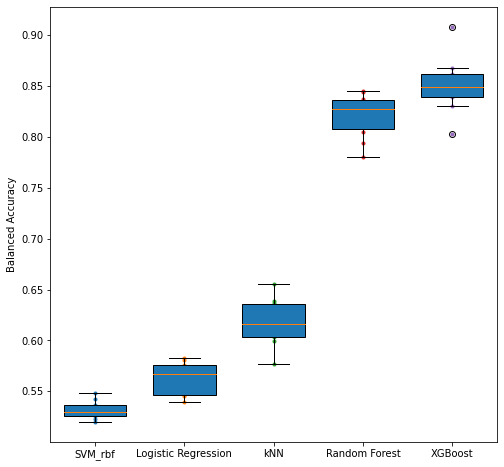

In [ ]:
import matplotlib.pyplot as plt
# Set figure size.
plt.figure(figsize=(8, 8))


plt.plot([1] * 10, svc_rbf_scores, ".")
plt.plot([2] * 10, logistic_scores, ".")
plt.plot([3] * 10, knn_scores, ".")
plt.plot([4] * 10, forest_scores, ".")
plt.plot([5] * 10, xgb_scores, ".")


plt.boxplot([svc_rbf_scores, logistic_scores, knn_scores, forest_scores, xgb_scores],
            labels=('SVM_rbf', 'Logistic Regression', 'kNN', 'Random Forest', 'XGBoost'), widths = 0.7, patch_artist = True, autorange = True)
plt.ylabel("Balanced Accuracy")
plt.show()

###**Parameter Tuning**
We will apply 3 methods on both Random Forest and XGBoost.

####**Building Full Pipelines**

In [ ]:
# Build two full pipelines: forest_pipeline and xgboost_pipeline
forest_pipeline = Pipeline([
    ("Preprocessing", preprocess_pipeline),
    ("Random_forest", RandomForestClassifier(n_estimators=100, random_state = 11)),
])

xgboost_pipeline = Pipeline([
    ("Preprocessing", preprocess_pipeline),
    ("XGBoost", GradientBoostingClassifier(n_estimators=100, random_state = 11)),
])

In [ ]:
forest_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'Preprocessing', 'Random_forest', 'Preprocessing__memory', 'Preprocessing__steps', 'Preprocessing__verbose', 'Preprocessing__Preprocessing', 'Preprocessing__Select', 'Preprocessing__Preprocessing__n_jobs', 'Preprocessing__Preprocessing__remainder', 'Preprocessing__Preprocessing__sparse_threshold', 'Preprocessing__Preprocessing__transformer_weights', 'Preprocessing__Preprocessing__transformers', 'Preprocessing__Preprocessing__verbose', 'Preprocessing__Preprocessing__verbose_feature_names_out', 'Preprocessing__Preprocessing__Numerical', 'Preprocessing__Preprocessing__Categorical', 'Preprocessing__Preprocessing__Numerical__memory', 'Preprocessing__Preprocessing__Numerical__steps', 'Preprocessing__Preprocessing__Numerical__verbose', 'Preprocessing__Preprocessing__Numerical__Imputer', 'Preprocessing__Preprocessing__Numerical__Scaler', 'Preprocessing__Preprocessing__Numerical__Imputer__add_indicator', 'Preprocessing__Preprocessing__Numerical__Imputer_

In [ ]:
xgboost_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'Preprocessing', 'XGBoost', 'Preprocessing__memory', 'Preprocessing__steps', 'Preprocessing__verbose', 'Preprocessing__Preprocessing', 'Preprocessing__Select', 'Preprocessing__Preprocessing__n_jobs', 'Preprocessing__Preprocessing__remainder', 'Preprocessing__Preprocessing__sparse_threshold', 'Preprocessing__Preprocessing__transformer_weights', 'Preprocessing__Preprocessing__transformers', 'Preprocessing__Preprocessing__verbose', 'Preprocessing__Preprocessing__verbose_feature_names_out', 'Preprocessing__Preprocessing__Numerical', 'Preprocessing__Preprocessing__Categorical', 'Preprocessing__Preprocessing__Numerical__memory', 'Preprocessing__Preprocessing__Numerical__steps', 'Preprocessing__Preprocessing__Numerical__verbose', 'Preprocessing__Preprocessing__Numerical__Imputer', 'Preprocessing__Preprocessing__Numerical__Scaler', 'Preprocessing__Preprocessing__Numerical__Imputer__add_indicator', 'Preprocessing__Preprocessing__Numerical__Imputer__copy'

####**Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV

forest_param_grid = [
    {'Random_forest__max_depth': [2, 5, 10],
     'Random_forest__min_samples_leaf': [2, 5, 10],
     'Random_forest__max_features': ["sqrt", "log2", None]},
    ]
grid_search = GridSearchCV(forest_pipeline, forest_param_grid, cv = 10, scoring='balanced_accuracy')
grid_search.fit(df_X, df_y)

grid_search.best_estimator_
forest_cv_res = pd.DataFrame(grid_search.cv_results_)
forest_cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
forest_cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Random_forest__max_depth,param_Random_forest__max_features,param_Random_forest__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
24,0.608911,0.015950,0.031210,0.001440,10,None,2,"{'Random_forest__max_depth': 10, 'Random_fores...",0.854665,0.884801,0.8924,0.889885,0.881394,0.884037,0.833155,0.851131,0.860636,0.832525,0.866463,0.021815,1
21,0.808253,0.298082,0.031824,0.002725,10,log2,2,"{'Random_forest__max_depth': 10, 'Random_fores...",0.854665,0.884801,0.8924,0.889885,0.881394,0.884037,0.833155,0.851131,0.860636,0.832525,0.866463,0.021815,1
18,0.621618,0.012118,0.031208,0.001434,10,sqrt,2,"{'Random_forest__max_depth': 10, 'Random_fores...",0.854665,0.884801,0.8924,0.889885,0.881394,0.884037,0.833155,0.851131,0.860636,0.832525,0.866463,0.021815,1
25,0.596694,0.011242,0.030890,0.001197,10,None,5,"{'Random_forest__max_depth': 10, 'Random_fores...",0.862998,0.884801,0.8924,0.889885,0.874319,0.875120,0.836547,0.850502,0.856615,0.835287,0.865847,0.019802,4
22,0.621146,0.017572,0.030841,0.002303,10,log2,5,"{'Random_forest__max_depth': 10, 'Random_fores...",0.862998,0.884801,0.8924,0.889885,0.874319,0.875120,0.836547,0.850502,0.856615,0.835287,0.865847,0.019802,4


In [ ]:
xgboost_param_grid = [
    {'XGBoost__max_depth': [2, 5, 10],
     'XGBoost__max_leaf_nodes': [2, 5, 10],
     'XGBoost__max_features': ["sqrt", "log2", None]},
    ]

grid_search = GridSearchCV(xgboost_pipeline, xgboost_param_grid, cv = 10, scoring='balanced_accuracy')
grid_search.fit(df_X, df_y)

grid_search.best_estimator_
xgboost_cv_res = pd.DataFrame(grid_search.cv_results_)
xgboost_cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
xgboost_cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_XGBoost__max_depth,param_XGBoost__max_features,param_XGBoost__max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
26,0.665693,0.016933,0.011771,0.001391,10,None,10,"{'XGBoost__max_depth': 10, 'XGBoost__max_featu...",0.854403,0.868501,0.886845,0.884067,0.877725,0.890192,0.831408,0.842601,0.855498,0.830149,0.862139,0.021483,1
23,0.660967,0.016568,0.011798,0.001266,10,log2,10,"{'XGBoost__max_depth': 10, 'XGBoost__max_featu...",0.854403,0.868501,0.886845,0.884067,0.877725,0.890192,0.831408,0.842601,0.855498,0.830149,0.862139,0.021483,1
20,0.671875,0.016271,0.011422,0.000288,10,sqrt,10,"{'XGBoost__max_depth': 10, 'XGBoost__max_featu...",0.854403,0.868501,0.886845,0.884067,0.877725,0.890192,0.831408,0.842601,0.855498,0.830149,0.862139,0.021483,1
11,0.910972,0.361222,0.015867,0.009400,5,sqrt,10,"{'XGBoost__max_depth': 5, 'XGBoost__max_featur...",0.856551,0.865723,0.886845,0.883176,0.877096,0.879142,0.832038,0.842601,0.855498,0.831408,0.861008,0.019681,4
14,0.664099,0.017387,0.011593,0.000677,5,log2,10,"{'XGBoost__max_depth': 5, 'XGBoost__max_featur...",0.856551,0.865723,0.886845,0.883176,0.877096,0.879142,0.832038,0.842601,0.855498,0.831408,0.861008,0.019681,4


####**Halving Grid Search**

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

forest_param_grid = [
    {'Random_forest__max_depth': np.arange(2, 5, 10),
     'Random_forest__min_samples_leaf': np.arange(2, 5, 10),
     'Random_forest__max_features': ["sqrt", "log2", None]},
    ]

# Change to new strategy starting here
halving_grid_search = HalvingGridSearchCV(forest_pipeline, forest_param_grid, cv=10,
                                    min_resources='exhaust', # use all data in the last round, start with as needed
                                    scoring='balanced_accuracy')
halving_grid_search.fit(df_X, df_y)

halving_grid_cv_res = pd.DataFrame(halving_grid_search.cv_results_)  # convert to DF for convenience
# In the end, we care about performances in the last iteration (using most data)
# So, let's sort by iteration (descending), then by test score (descending)
halving_grid_cv_res.sort_values(by=['iter', 'mean_test_score'], ascending=False, inplace=True)
halving_grid_cv_res.head()

,iter,n_resources,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Random_forest__max_depth,param_Random_forest__max_features,param_Random_forest__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
3,1,9750,0.888121,0.426996,0.045387,0.017525,2,None,2,"{'Random_forest__max_depth': 2, 'Random_forest...",0.770440,0.732075,0.792296,0.759696,0.751625,0.816253,0.743271,0.758729,0.781844,0.760131,0.766636,0.023419,1,0.772476,0.732741,0.770056,0.773664,0.774559,0.767371,0.775501,0.773780,0.771206,0.773627,0.768498,0.012133
0,0,3250,0.624569,0.279697,0.050193,0.031227,2,sqrt,2,"{'Random_forest__max_depth': 2, 'Random_forest...",0.748833,0.766941,0.659957,0.726883,0.571846,0.845455,0.716712,0.581229,0.594444,0.746136,0.695844,0.086172,2,0.725957,0.737435,0.644263,0.787579,0.658337,0.763885,0.779293,0.578944,0.584462,0.720869,0.698102,0.073048
1,0,3250,0.494954,0.139336,0.029588,0.008679,2,log2,2,"{'Random_forest__max_depth': 2, 'Random_forest...",0.748833,0.766941,0.659957,0.726883,0.571846,0.845455,0.716712,0.581229,0.594444,0.746136,0.695844,0.086172,2,0.725957,0.737435,0.644263,0.787579,0.658337,0.763885,0.779293,0.578944,0.584462,0.720869,0.698102,0.073048
2,0,3250,0.371807,0.091709,0.021680,0.000914,2,None,2,"{'Random_forest__max_depth': 2, 'Random_forest...",0.748833,0.766941,0.659957,0.726883,0.571846,0.845455,0.716712,0.581229,0.594444,0.746136,0.695844,0.086172,2,0.725957,0.737435,0.644263,0.787579,0.658337,0.763885,0.779293,0.578944,0.584462,0.720869,0.698102,0.073048


In [ ]:
xgboost_param_grid = [
    {'XGBoost__max_depth': np.arange(2, 5, 10),
     'XGBoost__max_leaf_nodes': np.arange(2, 5, 10),
     'XGBoost__max_features': ["sqrt", "log2", None]},
    ]
# Change to new strategy starting here
halving_grid_search = HalvingGridSearchCV(xgboost_pipeline, xgboost_param_grid, cv=10,
                                    min_resources='exhaust', # use all data in the last round, start with as needed
                                    scoring='balanced_accuracy')
halving_grid_search.fit(df_X, df_y)

halving_grid_cv_res = pd.DataFrame(halving_grid_search.cv_results_)  # convert to DF for convenience
# In the end, we care about performances in the last iteration (using most data)
# So, let's sort by iteration (descending), then by test score (descending)
halving_grid_cv_res.sort_values(by=['iter', 'mean_test_score'], ascending=False, inplace=True)
halving_grid_cv_res.head()

,iter,n_resources,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_XGBoost__max_depth,param_XGBoost__max_features,param_XGBoost__max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
3,1,9750,0.471661,0.023941,0.010310,0.000890,2,None,2,"{'XGBoost__max_depth': 2, 'XGBoost__max_featur...",0.770283,0.792191,0.800577,0.765828,0.754455,0.802483,0.742826,0.765799,0.790031,0.761920,0.774639,0.019362,1,0.779399,0.776965,0.776042,0.779888,0.774168,0.767486,0.782461,0.779899,0.777198,0.780334,0.777384,0.004018
0,0,3250,0.257980,0.016890,0.008984,0.000847,2,sqrt,2,"{'XGBoost__max_depth': 2, 'XGBoost__max_featur...",0.748120,0.775711,0.758232,0.804717,0.775051,0.775997,0.685963,0.738667,0.600845,0.750033,0.741333,0.055457,2,0.770554,0.769599,0.772958,0.806115,0.773943,0.759777,0.761143,0.782655,0.656259,0.787029,0.764003,0.038131
1,0,3250,0.252593,0.008550,0.008665,0.000501,2,log2,2,"{'XGBoost__max_depth': 2, 'XGBoost__max_featur...",0.748120,0.775711,0.758232,0.804717,0.775051,0.775997,0.685963,0.738667,0.600845,0.750033,0.741333,0.055457,2,0.770554,0.769599,0.772958,0.806115,0.773943,0.759777,0.761143,0.782655,0.656259,0.787029,0.764003,0.038131
2,0,3250,0.245421,0.008639,0.009186,0.001373,2,None,2,"{'XGBoost__max_depth': 2, 'XGBoost__max_featur...",0.748120,0.775711,0.758232,0.804717,0.775051,0.775997,0.685963,0.738667,0.600845,0.750033,0.741333,0.055457,2,0.770554,0.769599,0.772958,0.806115,0.773943,0.759777,0.761143,0.782655,0.656259,0.787029,0.764003,0.038131


####**Random Search**

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from scipy.stats import randint

forest_param_grid = [
    {'Random_forest__max_depth': randint(2, 5, 10),
     'Random_forest__min_samples_leaf': randint(2, 5, 10),
     'Random_forest__max_features': ["sqrt", "log2", None]},
    ]
# This is where we switch to halving version ...
halving_random_search = HalvingRandomSearchCV(forest_pipeline, forest_param_grid,
                                      n_candidates=25, cv=10,
                                      min_resources='exhaust',
                                      scoring='balanced_accuracy',
                                      random_state=42)
halving_random_search.fit(df_X, df_y)
halving_random_search.best_estimator_
halving_random_cv_res = pd.DataFrame(halving_random_search.cv_results_)
# In the end, we care about performances in the last iteration (using most data)
# So, let's sort by iteration (descending), then by test score (descending)
halving_random_cv_res.sort_values(by=['iter', 'mean_test_score'], ascending=False, inplace=True)
halving_random_cv_res.head()

,iter,n_resources,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Random_forest__max_depth,param_Random_forest__max_features,param_Random_forest__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
34,2,9747,1.031062,0.465734,0.055148,0.032386,13,log2,13,"{'Random_forest__max_depth': 13, 'Random_fores...",0.851588,0.861923,0.888528,0.884922,0.874923,0.860018,0.832144,0.837919,0.865244,0.840772,0.859798,0.018419,1,0.869494,0.869075,0.868851,0.871510,0.869313,0.865751,0.869754,0.870414,0.869900,0.873175,0.869724,0.001811
35,2,9747,0.866852,0.240243,0.045517,0.014297,13,None,13,"{'Random_forest__max_depth': 13, 'Random_fores...",0.851588,0.861923,0.888528,0.884922,0.874923,0.860018,0.832144,0.837919,0.865244,0.840772,0.859798,0.018419,1,0.869494,0.869075,0.868851,0.871510,0.869313,0.865751,0.869754,0.870414,0.869900,0.873175,0.869724,0.001811
36,2,9747,0.611249,0.081832,0.033354,0.007972,13,log2,13,"{'Random_forest__max_depth': 13, 'Random_fores...",0.851588,0.861923,0.888528,0.884922,0.874923,0.860018,0.832144,0.837919,0.865244,0.840772,0.859798,0.018419,1,0.869494,0.869075,0.868851,0.871510,0.869313,0.865751,0.869754,0.870414,0.869900,0.873175,0.869724,0.001811
25,1,3249,0.346663,0.016001,0.022365,0.002703,12,log2,13,"{'Random_forest__max_depth': 12, 'Random_fores...",0.855943,0.859615,0.877693,0.880197,0.859761,0.918978,0.825744,0.837986,0.809259,0.814101,0.853928,0.031917,4,0.850461,0.845364,0.846990,0.850565,0.845142,0.845575,0.858697,0.848545,0.858468,0.859445,0.850925,0.005517
26,1,3249,0.334573,0.015355,0.023533,0.004642,13,log2,13,"{'Random_forest__max_depth': 13, 'Random_fores...",0.855943,0.859615,0.877693,0.880197,0.859761,0.918978,0.825744,0.837986,0.809259,0.814101,0.853928,0.031917,4,0.850461,0.845364,0.846990,0.850565,0.845142,0.845575,0.858697,0.848545,0.858468,0.859445,0.850925,0.005517


In [ ]:
xgboost_param_grid = [
    {'XGBoost__max_depth': np.arange(2, 5, 10),
     'XGBoost__max_leaf_nodes': np.arange(2, 5, 10),
     'XGBoost__max_features': ["sqrt", "log2", None]},
    ]
# This is where we switch to halving version ...
halving_random_search = HalvingRandomSearchCV(xgboost_pipeline, xgboost_param_grid,
                                      n_candidates=25, cv=10,
                                      min_resources='exhaust',
                                      scoring='balanced_accuracy',
                                      random_state=42)
halving_random_search.fit(df_X, df_y)
halving_random_search.best_estimator_
halving_random_cv_res = pd.DataFrame(halving_random_search.cv_results_)
# In the end, we care about performances in the last iteration (using most data)
# So, let's sort by iteration (descending), then by test score (descending)
halving_random_cv_res.sort_values(by=['iter', 'mean_test_score'], ascending=False, inplace=True)
halving_random_cv_res.head()

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 3 is smaller than n_iter=25. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


,iter,n_resources,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_XGBoost__max_leaf_nodes,param_XGBoost__max_features,param_XGBoost__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
3,1,9750,0.663235,0.156738,0.012981,0.001755,2,None,2,"{'XGBoost__max_leaf_nodes': 2, 'XGBoost__max_f...",0.770283,0.792191,0.800577,0.765828,0.754455,0.802483,0.742826,0.765799,0.790031,0.761920,0.774639,0.019362,1,0.779399,0.776965,0.776042,0.779888,0.774168,0.767486,0.782461,0.779899,0.777198,0.780334,0.777384,0.004018
0,0,3250,0.358832,0.223465,0.010780,0.003387,2,sqrt,2,"{'XGBoost__max_leaf_nodes': 2, 'XGBoost__max_f...",0.801746,0.775802,0.769657,0.646737,0.755265,0.621820,0.601572,0.657125,0.603765,0.601961,0.683545,0.077875,2,0.757982,0.731240,0.733654,0.642642,0.755141,0.638029,0.638825,0.647256,0.648686,0.642092,0.683555,0.050446
1,0,3250,0.242811,0.006155,0.008453,0.000247,2,log2,2,"{'XGBoost__max_leaf_nodes': 2, 'XGBoost__max_f...",0.801746,0.775802,0.769657,0.646737,0.755265,0.621820,0.601572,0.657125,0.603765,0.601961,0.683545,0.077875,2,0.757982,0.731240,0.733654,0.642642,0.755141,0.638029,0.638825,0.647256,0.648686,0.642092,0.683555,0.050446
2,0,3250,0.244446,0.009543,0.008998,0.001080,2,None,2,"{'XGBoost__max_leaf_nodes': 2, 'XGBoost__max_f...",0.801746,0.775802,0.769657,0.646737,0.755265,0.621820,0.601572,0.657125,0.603765,0.601961,0.683545,0.077875,2,0.757982,0.731240,0.733654,0.642642,0.755141,0.638029,0.638825,0.647256,0.648686,0.642092,0.683555,0.050446


####**Halving Random Search**

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from scipy.stats import randint

forest_param_grid = [
    {'Random_forest__max_depth': randint(2, 5, 10),
     'Random_forest__min_samples_leaf': randint(2, 5, 10),
     'Random_forest__max_features': ["sqrt", "log2", None]},
    ]

# This is where we switch to halving version ...
halving_random_search = HalvingRandomSearchCV(forest_pipeline, forest_param_grid,
                                      n_candidates=25, cv=10,
                                      min_resources='exhaust',
                                      scoring='balanced_accuracy',
                                      random_state=42)
halving_random_search.fit(df_X, df_y)
halving_random_search.best_estimator_
halving_random_cv_res = pd.DataFrame(halving_random_search.cv_results_)
# In the end, we care about performances in the last iteration (using most data)
# So, let's sort by iteration (descending), then by test score (descending)
halving_random_cv_res.sort_values(by=['iter', 'mean_test_score'], ascending=False, inplace=True)
halving_random_cv_res.head()

,iter,n_resources,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Random_forest__max_depth,param_Random_forest__max_features,param_Random_forest__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
34,2,9747,0.580215,0.014620,0.030181,0.000803,13,log2,13,"{'Random_forest__max_depth': 13, 'Random_fores...",0.851588,0.861923,0.888528,0.884922,0.874923,0.860018,0.832144,0.837919,0.865244,0.840772,0.859798,0.018419,1,0.869494,0.869075,0.868851,0.871510,0.869313,0.865751,0.869754,0.870414,0.869900,0.873175,0.869724,0.001811
35,2,9747,0.583708,0.018822,0.032445,0.003008,13,None,13,"{'Random_forest__max_depth': 13, 'Random_fores...",0.851588,0.861923,0.888528,0.884922,0.874923,0.860018,0.832144,0.837919,0.865244,0.840772,0.859798,0.018419,1,0.869494,0.869075,0.868851,0.871510,0.869313,0.865751,0.869754,0.870414,0.869900,0.873175,0.869724,0.001811
36,2,9747,0.585985,0.014093,0.030942,0.002136,13,log2,13,"{'Random_forest__max_depth': 13, 'Random_fores...",0.851588,0.861923,0.888528,0.884922,0.874923,0.860018,0.832144,0.837919,0.865244,0.840772,0.859798,0.018419,1,0.869494,0.869075,0.868851,0.871510,0.869313,0.865751,0.869754,0.870414,0.869900,0.873175,0.869724,0.001811
25,1,3249,0.354106,0.043162,0.022234,0.001383,12,log2,13,"{'Random_forest__max_depth': 12, 'Random_fores...",0.855943,0.859615,0.877693,0.880197,0.859761,0.918978,0.825744,0.837986,0.809259,0.814101,0.853928,0.031917,4,0.850461,0.845364,0.846990,0.850565,0.845142,0.845575,0.858697,0.848545,0.858468,0.859445,0.850925,0.005517
26,1,3249,0.472222,0.098542,0.028725,0.005179,13,log2,13,"{'Random_forest__max_depth': 13, 'Random_fores...",0.855943,0.859615,0.877693,0.880197,0.859761,0.918978,0.825744,0.837986,0.809259,0.814101,0.853928,0.031917,4,0.850461,0.845364,0.846990,0.850565,0.845142,0.845575,0.858697,0.848545,0.858468,0.859445,0.850925,0.005517


In [ ]:
xgboost_param_grid = [
    {'XGBoost__max_depth': randint(2, 5, 10),
     'XGBoost__max_leaf_nodes': randint(2, 5, 10),
     'XGBoost__max_features': ["sqrt", "log2", None]},
    ]

# This is where we switch to halving version ...
halving_random_search = HalvingRandomSearchCV(xgboost_pipeline, xgboost_param_grid,
                                      n_candidates=25, cv=10,
                                      min_resources='exhaust',
                                      scoring='balanced_accuracy',
                                      random_state=42)
halving_random_search.fit(df_X, df_y)
halving_random_search.best_estimator_
halving_random_cv_res = pd.DataFrame(halving_random_search.cv_results_)
# In the end, we care about performances in the last iteration (using most data)
# So, let's sort by iteration (descending), then by test score (descending)
halving_random_cv_res.sort_values(by=['iter', 'mean_test_score'], ascending=False, inplace=True)
halving_random_cv_res.head()

,iter,n_resources,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_XGBoost__max_depth,param_XGBoost__max_features,param_XGBoost__max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
36,2,9747,0.665664,0.027087,0.011528,0.000775,13,None,13,"{'XGBoost__max_depth': 13, 'XGBoost__max_featu...",0.854366,0.863812,0.889157,0.882774,0.877701,0.879115,0.830884,0.834916,0.859719,0.830112,0.860256,0.021127,1,0.870684,0.867997,0.868417,0.875232,0.869970,0.867794,0.881028,0.868675,0.875428,0.874504,0.871973,0.004164
34,2,9747,0.663586,0.019513,0.011880,0.001173,14,None,12,"{'XGBoost__max_depth': 14, 'XGBoost__max_featu...",0.854366,0.865701,0.886364,0.882774,0.877701,0.879745,0.831514,0.835547,0.854824,0.830112,0.859865,0.020762,2,0.870684,0.864960,0.865338,0.873147,0.869662,0.867178,0.877163,0.867751,0.873930,0.874196,0.870401,0.003917
35,2,9747,0.666969,0.026685,0.011814,0.000903,14,log2,14,"{'XGBoost__max_depth': 14, 'XGBoost__max_featu...",0.854366,0.863812,0.889157,0.882774,0.876441,0.879115,0.829996,0.834916,0.856326,0.828851,0.859575,0.021359,3,0.870684,0.868613,0.868109,0.874994,0.871202,0.869881,0.877554,0.868983,0.876393,0.878773,0.872519,0.003806
26,1,3249,0.343051,0.011121,0.010114,0.000881,13,None,13,"{'XGBoost__max_depth': 13, 'XGBoost__max_featu...",0.861141,0.853726,0.840505,0.868746,0.848593,0.918978,0.836105,0.861795,0.794444,0.798856,0.848289,0.033682,4,0.869194,0.859145,0.864170,0.872794,0.862973,0.873995,0.882267,0.875298,0.883279,0.885913,0.872903,0.008657
25,1,3249,0.348975,0.010595,0.009626,0.001062,14,log2,14,"{'XGBoost__max_depth': 14, 'XGBoost__max_featu...",0.861141,0.853726,0.842482,0.870684,0.848593,0.918978,0.827630,0.853859,0.794444,0.794965,0.846650,0.034497,5,0.869405,0.860051,0.866923,0.873004,0.862763,0.875830,0.881682,0.876844,0.884206,0.884502,0.873521,0.008220
